In [1]:
import pandas as pd
ageinc_df = pd.read_csv('ageinc.csv')

In [2]:
ageinc_df['z_income'] = (ageinc_df['income'] - ageinc_df['income'].mean())/ageinc_df['income'].std()
ageinc_df['z_age'] = (ageinc_df['age'] - ageinc_df['age'].mean())/ageinc_df['age'].std()

In [3]:
from sklearn import cluster

X = ageinc_df[['z_income','z_age']]
bandwidth = cluster.estimate_bandwidth(X, quantile=0.1)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(X)

MeanShift(bandwidth=0.636820406937075, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [4]:
ageinc_df['cluster'] = ms.labels_
print("Number of clusters: %d" % len(ageinc_df['cluster'].unique()))

Number of clusters: 4


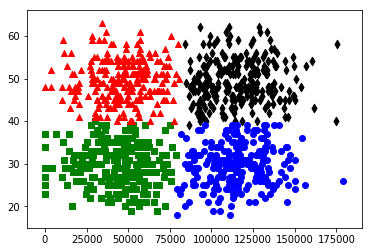

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in ageinc_df['cluster'].unique():
    d = ageinc_df[ageinc_df['cluster'] == c]
    plt.scatter(d['income'], d['age'], marker=markers[c], color=colors[c])    

plt.show()